# Naive Bayes Classifier in Python

<a class="anchor" id="0.1"></a>
# **Table of Contents**

1.	[Introduction to Naive Bayes algorithm](#1)
2. [Guassian naive bayes algorithm](#2)
3.	[Import dataset](#3)
4.	[Basic EDA](#4)
5.[Heatmap](#5)
6.[Normalize data](#6)
7.[Naive bayes classifier](#7)
8.[confusion matrix](#8)
9.[LDA](#9)
10.[QDA](#10)

# INTRODUCTION<a class="anchor" id="1"></a>

[Table of Contents](#0.1)

<br>
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. 

**What is Naive Bayes algorithm?**

Naive Bayes is a classification technique based on Bayes’ Theorem(*Probability theory*) with an assumption that all the features that predicts the target value are independent of each other. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature in determining the target value.

This assumption we just read about is very **Naive** when we are dealing with real world data because most of the times, features do depend on each other in determining the target .

> Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Bayes theorem provides a way of calculating posterior probability P(c|x) - *(read as Probability of **c** given **x**)*,  from P(c), P(x) and P(x|c). Look at the equation below:
>
> $$\mathbf{P} \left({x \mid c} \right) = \frac{\mathbf{P} \left ({c \mid x} \right) \mathbf{P} \left({c} \right)}{\mathbf{P} \left( {x} \right)}$$

In the *above* equation,

* P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
* P(c) is the prior probability of class **c**.
* P(x|c) is the likelihood which is the probability of predictor(the query  **x**) given class.
* P(x) is the prior probability of predictor **x**.


In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features.  Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.


Naïve Bayes models are also known as `simple Bayes` or `independent Bayes`. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning



## **2.Gaussian Naïve Bayes algorithm*** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution. For example, suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let µi be the mean of the values and let σi be the variance of the values associated with the ith class. Suppose we have some observation value xi . Then, the probability distribution of xi given a class can be computed by the following equation –


![Gaussian Naive Bayes algorithm](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEWCcq1XtC1Yw20KWSHn2axYa7eY-a0T1TGtdVn5PvOpv9wW3FeA&s)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split




## Importing Data<a class="anchor" id="3"></a>

[Table of Contents](#0.3)


In [2]:
# We are reading our data
df = pd.read_csv("C:/Users/nehar/Desktop/CHRIST/semester2/heart_EDA.csv")

In [3]:
# First 5 rows of our data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1.0,3,145.0,233.0,1.0,0,150,0,2.3,0,0.0,1,1
1,37,1.0,2,130.0,250.0,0.0,1,187,0,3.5,0,0.0,2,1
2,41,0.0,1,130.0,204.0,0.0,0,172,0,1.4,2,0.0,2,1
3,56,1.0,1,120.0,236.0,NaN,1,178,0,0.8,2,0.0,2,1
4,57,0.0,0,120.0,NaN,0.0,1,163,1,0.6,2,0.0,2,1


Data contains; <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* output - have disease or not (1=yes, 0=no)

## Basic EDA<a class="anchor" id="4"></a>

[Table of Contents](#0.4)

In [4]:

# Replace missing values with mean
df1 = df.fillna(df.mean())

In [5]:
df1.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [41]:
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1.0,3,145.0,233.000000,1.000000,0,150,0,2.3,0,0.0,1,1
1,37,1.0,2,130.0,250.000000,0.000000,1,187,0,3.5,0,0.0,2,1
2,41,0.0,1,130.0,204.000000,0.000000,0,172,0,1.4,2,0.0,2,1
3,56,1.0,1,120.0,236.000000,0.159011,1,178,0,0.8,2,0.0,2,1
4,57,0.0,0,120.0,246.121429,0.000000,1,163,1,0.6,2,0.0,2,1


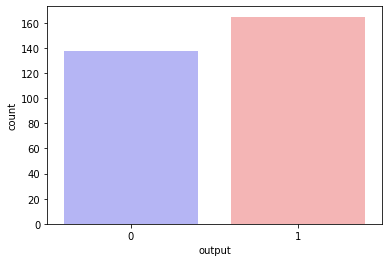

In [6]:
sns.countplot(x="output", data=df1, palette="bwr")
plt.show()

In [7]:
countNoDisease = len(df1[df1.output == 0])
countHaveDisease = len(df1[df1.output == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df1.output))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df1.output))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


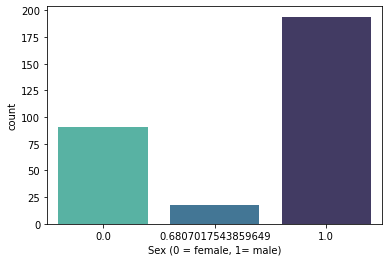

In [8]:
sns.countplot(x='sex', data=df1, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [9]:
countFemale = len(df1[df1.sex == 0])
countMale = len(df1[df1.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df1.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df1.sex))*100)))

Percentage of Female Patients: 30.03%
Percentage of Male Patients: 64.03%


In [10]:
df1.groupby('output').mean()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,56.601449,0.822070,0.478261,134.398551,251.163820,0.166334,0.449275,139.101449,0.550725,1.585507,1.166667,1.173888,2.543478
1,52.496970,0.562467,1.375758,129.839839,241.904156,0.152886,0.593939,158.466667,0.139394,0.583030,1.593939,0.393898,2.121212


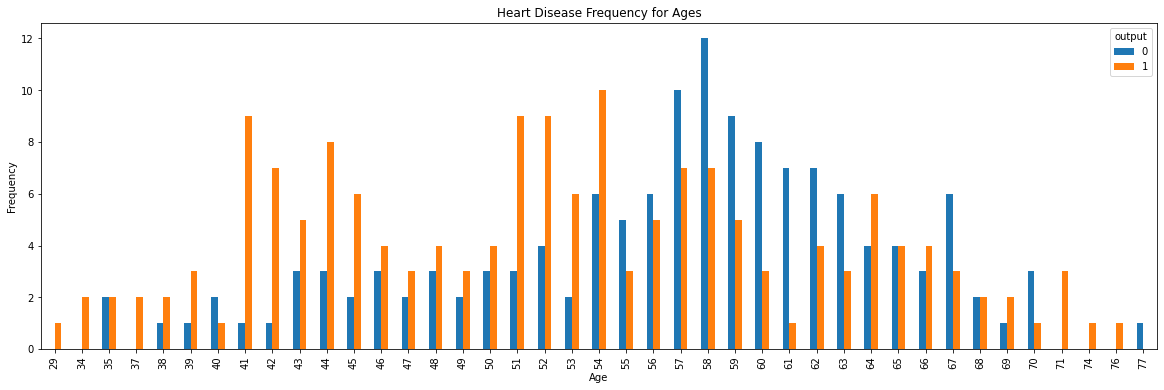

In [11]:
pd.crosstab(df1.age,df1.output).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

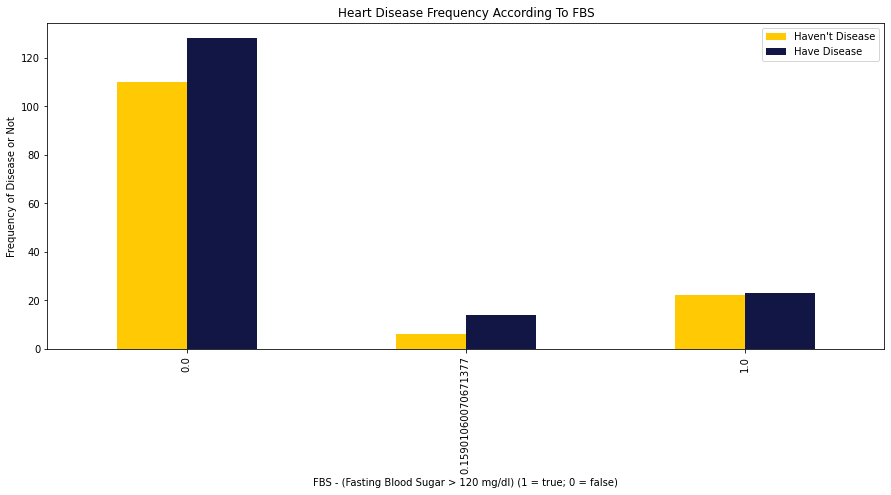

In [12]:
pd.crosstab(df1.fbs,df1.output).plot(kind="bar",figsize=(15,6),color=['#FFC904','#111645' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')

plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

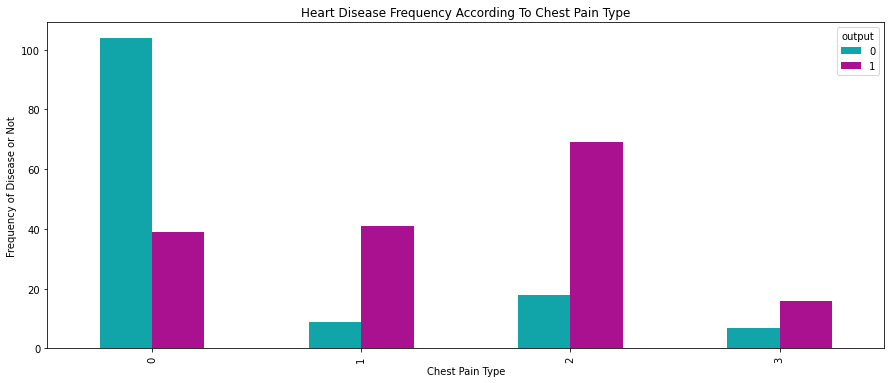

In [13]:
pd.crosstab(df1.cp,df1.output).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')

plt.ylabel('Frequency of Disease or Not')
plt.show()

## correlation plot<a class="anchor" id="5"></a>

[Table of Contents](#0.5)



In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlation matrix
corr_matrix = df1.corr()

print(corr_matrix)



               age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.084240 -0.068653  0.276293  0.186963  0.115130   
sex      -0.084240  1.000000 -0.041313 -0.059402 -0.172075  0.040996   
cp       -0.068653 -0.041313  1.000000  0.070211 -0.063772  0.088777   
trtbps    0.276293 -0.059402  0.070211  1.000000  0.112037  0.168221   
chol      0.186963 -0.172075 -0.063772  0.112037  1.000000  0.014732   
fbs       0.115130  0.040996  0.088777  0.168221  0.014732  1.000000   
restecg  -0.116211 -0.047028  0.044421 -0.121266 -0.150994 -0.080643   
thalachh -0.398522 -0.063450  0.295762 -0.046786 -0.019003 -0.008551   
exng      0.096801  0.135315 -0.394280  0.059039  0.053448  0.024132   
oldpeak   0.210013  0.113990 -0.149230  0.197621  0.044047  0.001950   
slp      -0.168814 -0.030848  0.119717 -0.136884  0.018426 -0.057821   
caa       0.263706  0.119331 -0.180338  0.092671  0.066296  0.116767   
thall     0.068001  0.219426 -0.161736  0.072341  0.126000 -0.03

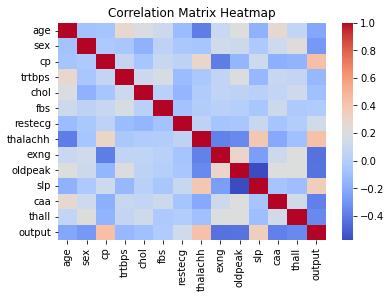

In [19]:
# Plot heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


if the assumption of independence does not hold in the data, the Naive Bayes classifier may not perform well and other classification methods may be more appropriate.

### Normalize Data<a class="anchor" id="6"></a>

[Table of Contents](#0.6)
<br>
<br>
<img src="https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863" width="400px"/>

 Normalization helps ensure that the Naive Bayes algorithm(Any ML algorithm) is not biased towards any particular feature due to its scale. This can lead to more accurate predictions and a better overall performance of the algorithm. feature A ranges from 0 to 1, while feature B ranges from 0 to 1000. If we were to train a Naive Bayes model on this dataset without normalization, feature B would have a much larger impact on the model due to its larger magnitude, regardless of its actual contribution to the target variable. Normalizing the input data to the same range of values using min-max scaling would mitigate this issue, allowing the model to weigh each feature more fairly.

X: This variable contains the independent variables used to predict the output variable. In this dataset, X contains the following features: age, sex, chest pain type, resting blood pressure, cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, oldpeak, the slope of the peak exercise ST segment, number of major vessels colored by flourosopy, and thalassemia.

y: This variable contains the dependent variable which is to be predicted using the input features. In this dataset, y contains the output variable 'output', which indicates whether a patient has heart disease or not. '1' indicates the presence of heart disease and '0' indicates the absence of heart disease.

# Naive Bayes Algorithm<a class="anchor" id="7"></a>

[Table of Contents](#0.7)


In [20]:
accuracies = {}


In [21]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score

# Load the dataset
data = df.copy()

# Replace missing values with mean
data = data.fillna(data.mean())

# Normalize the data
data = (data - data.min()) / (data.max() - data.min())

# Split the dataset into input (X) and output (y) variables
X = data.drop('output', axis=1)
y = data['output']


# Split the data into training and testing sets
#We will split our data. 80% of our data will be train data and 20% of it will be test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

accuracies['Naive Bayes'] = accuracy

print('Accuracy:', accuracy)


Accuracy: 0.8524590163934426


An accuracy score of 0.85 means that the Naive Bayes classifier correctly predicted the class label for 85% of the instances in the test dataset. In other words, out of all the instances in the test dataset, 85% were classified correctly by the classifier.

The accuracy score is a commonly used evaluation metric for classification models. It is calculated by dividing the number of correctly classified instances by the total number of instances in the test dataset.

While an accuracy score of 0.85 may seem high, it is important to consider the context in which the classifier is being used. In some applications, an accuracy score of 0.85 may be sufficient, while in others, a higher accuracy score may be required. Additionally, the accuracy score should always be interpreted in conjunction with other evaluation metrics, such as precision, recall, and F1 score, to get a more comprehensive understanding of the classifier's performance.

It is also worth noting that the Naive Bayes classifier assumes independence between the features, which may not always be true in real-world datasets. In such cases, other classification algorithms that do not make the same assumption, such as logistic regression or decision trees, may be more appropriate.

## Confusion Matrix<a class="anchor" id="8"></a>

[Table of Contents](#0.8)

A confusion matrix is a table that is used to evaluate the performance of a classification model. It is often used in supervised learning to understand how well a model is classifying instances into correct or incorrect categories. The matrix shows the true positives, true negatives, false positives, and false negatives of a model's predictions. The diagonal elements represent the correctly classified instances, while the off-diagonal elements represent the incorrectly classified instances. The number of true positives and true negatives gives the count of correctly classified instances, while the number of false positives and false negatives gives the count of incorrectly classified instances.


In [22]:
# Predicted values

y_head_nb = classifier.predict(X_test)


In [23]:
from sklearn.metrics import confusion_matrix


cm_nb = confusion_matrix(y_test,y_head_nb)



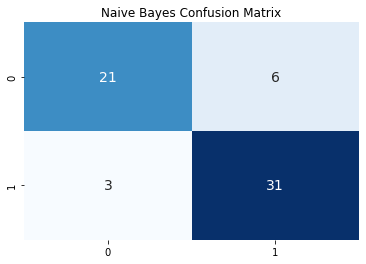

In [24]:
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 14})
plt.show()

The four cells of the confusion matrix represent the following:

True Positive (TP): The number of observations that are correctly classified as positive (belonging to the positive class) which is 21 here
False Positive (FP): The number of observations that are incorrectly classified as positive (belonging to the positive class, but actually belonging to the negative class) which is 6 here
False Negative (FN): The number of observations that are incorrectly classified as negative (belonging to the negative class, but actually belonging to the positive class) which is 3 here
True Negative (TN): The number of observations that are correctly classified as negative (belonging to the negative class) which is 31 here.

In [25]:
#for naive bayes classifier
# Evaluate the performance of the classifier
# Calculate the f-score
f_score_nb = f1_score(y_test, y_head_nb)
print('F-score of Naive bayes:', f_score_nb)

# Calculate the precision
precision_nb = precision_score(y_test, y_head_nb)
print('Precision of Naive Bayes:', precision_nb)

# Calculate the recall
recall_nb = recall_score(y_test, y_head_nb)
print('Recall of Naive Bayes:', recall_nb)

F-score of Naive bayes: 0.8732394366197184
Precision of Naive Bayes: 0.8378378378378378
Recall of Naive Bayes: 0.9117647058823529


# LDA<a class="anchor" id="9"></a>

[Table of Contents](#9)


Linear Discriminant Analysis (LDA) is a supervised learning algorithm used in machine learning for classification tasks. LDA is a statistical method that makes assumptions about the distribution of input data and aims to find a linear combination of input features that maximizes the separation between classes while minimizing the within-class variance.

LDA assumes that the input features have a multivariate normal distribution with equal covariance matrices for each class. The algorithm finds the projection of the input features onto a lower-dimensional space that maximizes the separation between the classes, while also minimizing the within-class variance. This projection can be used to classify new data points by projecting them onto the same lower-dimensional space and assigning them to the class with the closest centroid.

In [26]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


# Separate predictor variables and target variable
X = data.drop('output', axis=1)
y = data['output']



In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lda.predict(X_test)
accuracy2=lda.score(X_test,y_test)
accuracies['Linear Discriminant Analysis'] = accuracy2

# Print the accuracy score
print("Accuracy:", lda.score(X_test, y_test))


Accuracy: 0.8360655737704918


In [28]:
# Predicted values

y_head_lda = lda.predict(X_test)


In [29]:
from sklearn.metrics import confusion_matrix


cm_lda = confusion_matrix(y_test,y_head_lda)



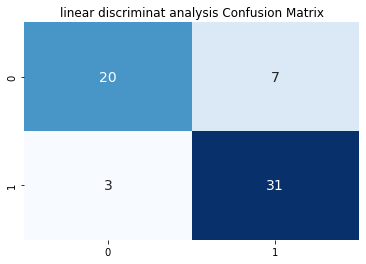

In [30]:
plt.title("linear discriminat analysis Confusion Matrix")
sns.heatmap(cm_lda,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 14})
plt.show()

The four cells of the confusion matrix represent the following:

True Positive (TP): The number of observations that are correctly classified as positive (belonging to the positive class) which is 20 here
False Positive (FP): The number of observations that are incorrectly classified as positive (belonging to the positive class, but actually belonging to the negative class) which is 7 here
False Negative (FN): The number of observations that are incorrectly classified as negative (belonging to the negative class, but actually belonging to the positive class) which is 3 here
True Negative (TN): The number of observations that are correctly classified as negative (belonging to the negative class) which is 31 here.

dict_keys(['Naive Bayes', 'Linear Discriminant Analysis']) dict_values([0.8524590163934426, 0.8360655737704918])


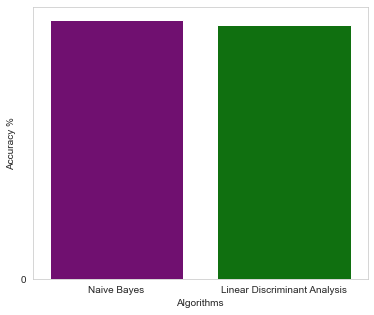

In [31]:
colors = ["purple", "green"]

sns.set_style("whitegrid")
plt.figure(figsize=(6,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
print(accuracies.keys(),accuracies.values())

sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

We can see that Naive Bayes performed slightly better than LDA in classifying the data. However, the difference between the accuracies is not very significant, so it could also be that the performance difference is due to random variation in the data or model fitting process.

It is also important to note that the accuracy score alone may not be sufficient to fully evaluate the performance of a model. It is recommended to also look at other metrics such as precision, recall, and F1 score to gain a more comprehensive understanding of the model's performance.

In [32]:
#for linear discriminant analysis
# Calculate the f-score
f_score_lda = f1_score(y_test, y_head_lda)
print('F-score of LDA:', f_score_lda)

# Calculate the precision
precision_lda = precision_score(y_test, y_head_lda)
print('Precision of LDA:', precision_lda)

# Calculate the recall
recall_lda = recall_score(y_test, y_head_lda)
print('Recall of LDA:', recall_lda)

F-score of LDA: 0.861111111111111
Precision of LDA: 0.8157894736842105
Recall of LDA: 0.9117647058823529


Based on the given evaluation metrics, the Naive Bayes classifier has a higher F-score (0.873) than the Linear Discriminant Analysis (LDA) classifier (0.861). The F-score is a harmonic mean of precision and recall, which takes both measures into account and gives a more balanced evaluation of the classifier's performance.

The Naive Bayes classifier also has a higher precision (0.838) than the LDA classifier (0.816), indicating that the Naive Bayes classifier produces fewer false positives (i.e., instances classified as positive but actually belonging to the negative class).

However, both classifiers have the same recall (0.912), which indicates that they both correctly identify a high proportion of positive instances in the dataset.

Overall, based on these evaluation metrics, the Naive Bayes classifier appears to be performing slightly better than the LDA classifier. However, it is important to note that the choice of the best classifier depends on various factors, such as the nature of the problem, the characteristics of the dataset, and the performance requirements of the application

# QDA<a class="anchor" id="10"></a>

[Table of Contents](#10)


Quadratic Discriminant Analysis (QDA) is a statistical method used in machine learning for classification tasks. Like LDA, QDA assumes that the input features have a multivariate normal distribution, but unlike LDA, it does not assume that the covariance matrices for each class are equal.

QDA aims to find a quadratic boundary that separates the classes in the input data. To do this, QDA calculates the mean and covariance matrices for each class in the dataset, just like LDA. However, instead of assuming that the covariance matrices are equal, QDA allows each class to have its own covariance matrix.

In [76]:
# Separate predictor variables and target variable


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [77]:
# ## Quadratic Discriminant Analysis 

# #### Split the data into training and testing sets: Next, we split the data into training and testing sets using train_test_split() function. We use 80% of the data for training and 20% for testing, and set the random_state parameter to 42 for reproducibility. 



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# #### Initialize QDA model 

# In[9]:


qda = QuadraticDiscriminantAnalysis()


# #### Fit the QDA model to the training data: We fit the QDA model to the training data using the fit() method. This step involves estimating the parameters of the QDA model from the training data. 

# In[10]:


qda.fit(X_train, y_train)


# #### Once the QDA model is trained, we use it to make predictions on the testing data using the predict() method.

# In[11]:


y_head_qda = qda.predict(X_test)


# In[12]:


accuracy3 = accuracy_score(y_test, y_head_qda)

accuracies['Quadratic Discriminant Analysis'] = accuracy3
print("Accuracy:", accuracy3)







Accuracy: 0.8360655737704918


In [78]:
# #### The QDA model on the testing data is 83.60% accurate. This gives us an estimate of how well our model is performing in terms of classification accuracy. 

# # Generate confusion matrix

In [79]:
#for QUADRATIC discriminant analysis
# Calculate the f-score
f_score_qda = f1_score(y_test, y_head_qda)
print('F-score of QDA:', f_score_qda)

# Calculate the precision
precision_qda = precision_score(y_test, y_head_qda)
print('Precision of QDA:', precision_qda)

# Calculate the recall
recall_qda = recall_score(y_test, y_head_qda)
print('Recall of QDA:', recall_qda)

F-score of QDA: 0.8529411764705882
Precision of QDA: 0.8529411764705882
Recall of QDA: 0.8529411764705882


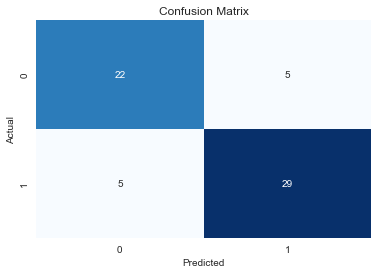

In [80]:
cm = confusion_matrix(y_test, y_pred)
cm


# In[14]:


sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


dict_keys(['Naive Bayes', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis']) dict_values([0.8524590163934426, 0.8360655737704918, 0.8360655737704918])


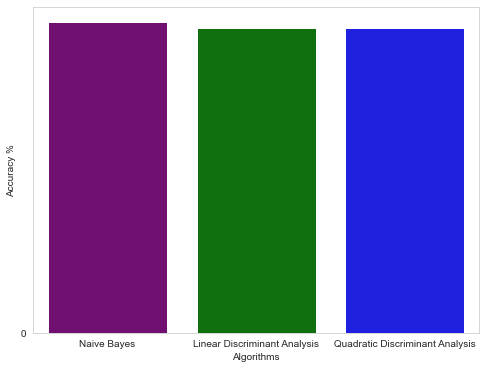

In [75]:
colors = ["purple", "green","blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
print(accuracies.keys(),accuracies.values())

sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

We can see that Naive Bayes performed slightly better than LDA and QDA in classifying the data. However, the difference between the accuracies is not very significant, so it could also be that the performance difference is due to random variation in the data or model fitting process.

It is also important to note that the accuracy score alone may not be sufficient to fully evaluate the performance of a model. It is recommended to also look at other metrics such as precision, recall, and F1 score to gain a more comprehensive understanding of the model's performance.